## 修改與簡化

- 為降低不確定性，取消價格機制
- 買賣家決定原本取決於價格
- 修改為人造隨機生成之小國網路

In [1]:
from functools import partial
import networkx as nx
from itertools import count
import numpy as np
from src.network_creation import (
    edge_distribution_to_bipartite_network,
    generate_degree_from_prob_list,
    get_probability_array_for_agents,
    generate_cross_broader_bipartite)

from matplotlib import pyplot as plt

In [2]:
node_n = 30
avg_edge = 5
total_edge = node_n * avg_edge

distribution_function = partial(np.random.exponential, scale=1)
edges = []
population = [1,1,0.5, 0.5]
for i in range(4):
    total_trading_volume = int( total_edge * population[i])
    probability_array = get_probability_array_for_agents( int( node_n * population[i]), distribution_function)
    edges.append(
        generate_degree_from_prob_list( total_trading_volume, probability_array)
    )

id_generator = count()
node_1, G1 = edge_distribution_to_bipartite_network(edges[0], edges[1], ("buyer", "seller"), id_generator, country = "home")
node_2, G2 = edge_distribution_to_bipartite_network(edges[2], edges[3], ("buyer", "seller"), id_generator, country = "foreign")
node_refs, combined = generate_cross_broader_bipartite(G1, G2, international_level=0.8)


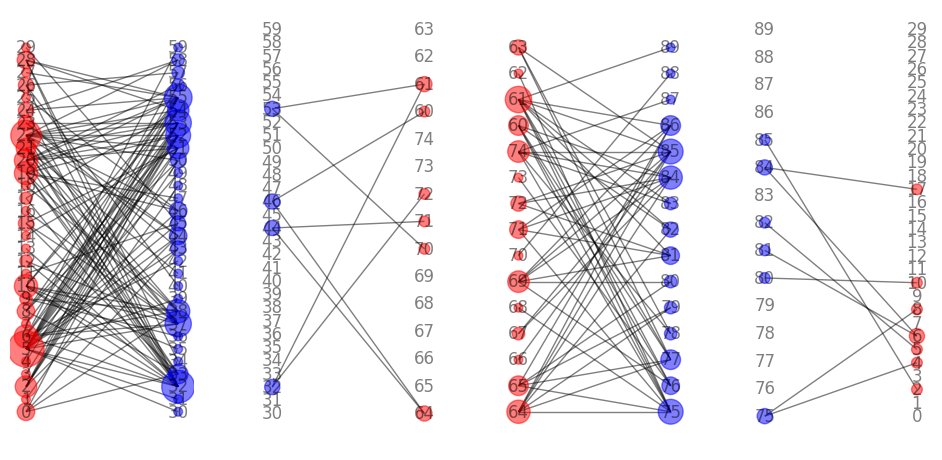

In [13]:
with_label_param = True

fig, axs = plt.subplots(1,4, figsize=(10,5))
fig.tight_layout()
pos1 = nx.bipartite_layout(G1, set(node_1), scale = 2)
pos2 = nx.bipartite_layout(G2, set(node_2), scale = 2)
nx.draw(
    G1,
    ax = axs[0],
    pos = pos1,
    node_color = ['r'] * node_n + ['b'] * node_n,
    alpha = 0.5,
    node_size =[ deg * 40 for deg in dict(G1.degree).values()],
    with_labels = with_label_param,
)

nx.draw(
    G2,
    ax = axs[2],
    pos = pos2,
    node_color = ['r'] * len(node_2) + ['b'] * len(node_2),
    alpha = 0.5,
    node_size =[ deg * 40 for deg in dict(G2.degree).values()],
    with_labels = with_label_param,
)


buyer1_and_seller_2 = (set(node_refs[0]) | set(node_refs[3]))
buyer2_and_seller_1 = (set(node_refs[1]) | set(node_refs[2]))
view_two_country_1 = nx.subgraph_view(combined, filter_node= lambda n: n in buyer1_and_seller_2)
view_two_country_2 = nx.subgraph_view(combined, filter_node= lambda n: n in buyer2_and_seller_1)

pos_b1s2 = nx.bipartite_layout(view_two_country_1, node_refs[3], scale = 2)
pos_b2s1 = nx.bipartite_layout(view_two_country_2, node_refs[1], scale = 2)
colors_1 = ['r'] * 30 + ['b'] * 15
colors_2 = ['b'] * 30 + ['r'] * 15
nx.draw(
    view_two_country_1,
    ax = axs[3],
    pos=pos_b1s2,
    node_color = colors_1,
    alpha = 0.5,
    node_size =[ deg * 60 for deg in dict(view_two_country_1.degree).values()],
    with_labels = with_label_param)

nx.draw(
    view_two_country_2,
    ax = axs[1],
    pos=pos_b2s1,
    node_color = colors_2,
    alpha = 0.5,
    node_size =[ deg * 60 for deg in dict(view_two_country_2.degree).values()],
    with_labels = with_label_param,
)